<a href="https://colab.research.google.com/github/ThisariG/ML-Playground/blob/main/Bank%20Note%20Authentication/banknoteAuthentication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Use Case**

Logistic Linear Regression on [banknote authentication Data Set](http://archive.ics.uci.edu/ml/datasets/banknote+authentication#)

The problem that is solved here is predicting whether a banknote is fake or real based on the variance, skewness, curosis and entropy of the Wavelet Transformed image.

**Attribute Information**
- Variance of Wavelet Transformed image (continuous)
- Skewness of Wavelet Transformed image (continuous)
- Curtosis of Wavelet Transformed image (continuous)
- Entropy of image (continuous)
- Class (integer)
    - 0 for Fake
    - 1 for Real

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#for splitting data into train and test set
from sklearn.model_selection import train_test_split

#logistic regression model
from sklearn.linear_model import LogisticRegression

#metrics for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#standardization 
from sklearn.preprocessing import StandardScaler



# Importing Data

In [ ]:
#importing data from GitHub
textData = "https://raw.githubusercontent.com/ThisariG/ML-Playground/main/Bank%20Note%20Authentication/data_banknote_authentication.txt"

#adding column names
features = ["Variance","Skewness","Curtosis","Entropy","Class"]
data = pd.read_csv(textData,names=features)

#checking if the data was loaded correctly
data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
data.shape

(1372, 5)

# Understanding the Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [ ]:
data.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


# Data Preprocessing

In [ ]:
#checking for any duplicates
data.duplicated().sum()

24

In [ ]:
#dropping duplicates
data.drop_duplicates( inplace=True)

In [ ]:
#checking the number of classes in the feature Class
np.unique(data['Class'])

array([0, 1])

In [ ]:
#checking for null values
data.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [ ]:
#defining the independent variables
x = data.drop(['Class'], axis=1).values

#defining the dependent variable
y = data['Class'].values

In [ ]:
print(x.shape)
print(y.shape)

(1348, 4)
(1348,)


In [ ]:
#splitting test and train data
x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y, 
    test_size=0.3, 
    random_state=42)

# Selection and Training of the Model

In [ ]:
#transforming data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Training the model using the training set
logistic_reg_model = LogisticRegression(random_state=0).fit(x_train, y_train)

In [ ]:
# Predicting the test set results
y_pred = logistic_reg_model.predict(x_test)

# Evaluation of the Model

In [ ]:
#using accuracy
print('Accuracy of logistic regression model on the test set: {:.2f}'
            .format(logistic_reg_model.score(x_test, y_test)))

Accuracy of logistic regression model on the test set: 0.99


In [ ]:
#using confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[145   2]
 [  0 123]]


In [ ]:
#using classification matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       147
           1       0.98      1.00      0.99       123

    accuracy                           0.99       270
   macro avg       0.99      0.99      0.99       270
weighted avg       0.99      0.99      0.99       270



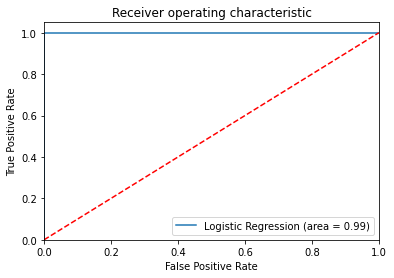

In [ ]:
#using receiver operating characteristic(ROC)

logit_roc_auc = roc_auc_score(y_test, logistic_reg_model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_reg_model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
logit_roc_auc

0.9931972789115646